In [1]:
import numpy as np
import pandas as pd

from src import preprocess, plotutils

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
DATA_DIR = "./data/"
CLINICAL_NOTES_FILE = DATA_DIR + "ClinNotes.csv"
MEDICAL_CONCEPTS_FILE = DATA_DIR + "MedicalConcepts.csv"

PROCESSDED_DATA_DIR = './processed_data/'
TFIDF_VECTOR_FILE = PROCESSDED_DATA_DIR + 'Tfidf_vector.npy'
TFIDF_EXTENDED_VECTOR_FILE = PROCESSDED_DATA_DIR + 'Tfidf_extended_vector.npy'
BIOWORDVEC_VECTOR_FILE = PROCESSDED_DATA_DIR + 'BioWordVec_vector.npy'
CLINICAL_BERT_VECTOR = PROCESSDED_DATA_DIR + 'Clinical_Bert_vector.npy'

# Use Case: Classification

Document vector can be useful to do classification tasks. In this notebook, we will use our constructed vectors of clinical notes to do a classfication task. Since we don't have a good labels for our clinical note, I will use the category of each clinical note as label for convenience. And the category of each clinical note is arguably a representation of the medical information encoded.

Since we have a very small dataset of around 800, training a classifier will be very prone to overfitting and randomness. Instead we will use TSNE to reduce the vectors to 2D and plot them to have a qualitative view on the separation. The degree of separation can be a good indicator of claasification result if we really use the vector to train a classifier.

In [4]:
df_clinical = pd.read_csv(CLINICAL_NOTES_FILE)

In [5]:
labels = df_clinical['category'].to_numpy()

In [6]:
vectors_tfidf = np.load(TFIDF_VECTOR_FILE)
vectors_tfidf_extended = np.load(TFIDF_EXTENDED_VECTOR_FILE)
vectors_biowordvec = np.load(BIOWORDVEC_VECTOR_FILE)
vectors_clinical_bert = np.load(CLINICAL_BERT_VECTOR)

## TF-IDF
Below we plot the TSNE visualization of our plain TF-IDF vectors and those extended with related medical terms. We can generally see a good separation of the three categories. The extended version has a better separation around the intersected region. Both plots have small clusters within the same category, which shows the potential for finer grained classification task. The extended version exhibits more and clearer small clusters within same category.

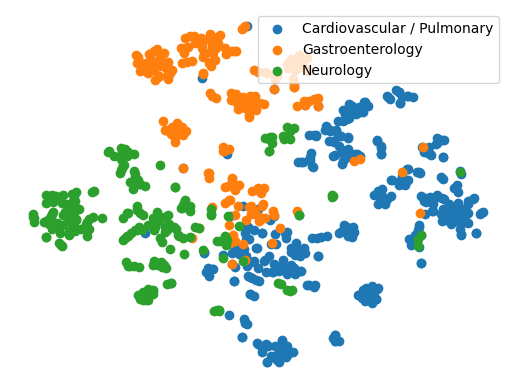

In [7]:
plotutils.plot_tsne(vectors_tfidf, labels)

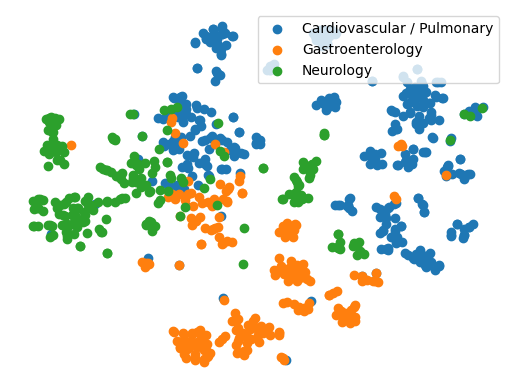

In [8]:
plotutils.plot_tsne(vectors_tfidf_extended, labels)

## Word Vector Aggregation
We can see a very good separation of the data points. It outperms TF-IDF vectorization even with the simplest averaging aggregation. There are also small clusters within same category which shows potential for finer grained classification tasks.

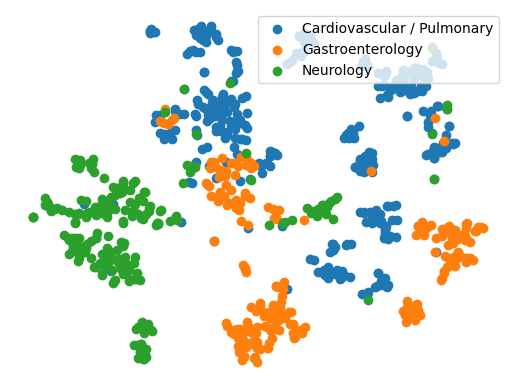

In [9]:
plotutils.plot_tsne(vectors_biowordvec, labels)

## Language Model based Vectorization
Below we can see a poor result of separation. Without further fine-tuning, the pooler output of the language model I have chosen is not a good representation of the whole document. Please refer to 5_Vectorization_ClinicalBert notebook for more detailed information.

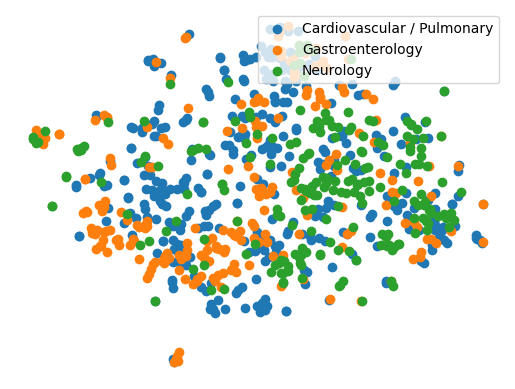

In [10]:
plotutils.plot_tsne(vectors_clinical_bert, labels)